**General Analysis of an Ice Cream Shop Sales**

This is a general sales analysis of our ice cream shop in Bangkok, based on data collected by our team. The purpose of this analysis is to summarize our past performance, confirm the reasons for the sales increase in Q3-Q4, and report to our team to brainstorm future business strategies.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt, seaborn as sns
import matplotlib.dates as mdates
%matplotlib inline

In [2]:
sales = pd.read_excel('/kaggle/input/ice-cream-sales-total-v2/ice_cream_sales_total.xlsx')

Read the date from excel

In [3]:
sales.head()

,line_name,name,address,latitude,longitude,tel,purchasing_date,purchasing_time,channel,chocolate,...,salted_egg,strawberry_cheese_cake,matcha,malt,salted_caramel_froyo,watermelon,yuzu,total,purchasing_price_after_gp,purchasing_price
0,NaN,NaN,NaN,13.82203,100.507048,NaN,2021-08-14,NaN,direct,2,...,0,0,0,0,0,0,0,8,600.0,600.0
1,NaN,NaN,NaN,13.71937,100.588496,NaN,2021-08-14,NaN,direct,1,...,0,0,0,0,0,0,0,4,348.0,348.0
2,NaN,NaN,NaN,13.806404,100.572635,NaN,2021-08-14,NaN,direct,1,...,0,0,0,0,0,0,0,5,430.0,430.0
3,NaN,NaN,NaN,13.87397,100.631423,NaN,2021-08-14,NaN,direct,3,...,0,0,0,0,0,0,0,12,938.0,938.0
4,NaN,NaN,NaN,13.949663,100.646382,NaN,2021-08-14,NaN,direct,3,...,0,0,0,0,0,0,0,15,1237.0,1237.0


Review the data

In [4]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1716 entries, 0 to 1715
Data columns (total 26 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   line_name                  0 non-null      float64       
 1   name                       0 non-null      float64       
 2   address                    797 non-null    object        
 3   latitude                   480 non-null    object        
 4   longitude                  480 non-null    float64       
 5   tel                        0 non-null      float64       
 6   purchasing_date            1716 non-null   datetime64[ns]
 7   purchasing_time            43 non-null     object        
 8   channel                    1716 non-null   object        
 9   chocolate                  1716 non-null   int64         
 10  banoffee                   1716 non-null   int64         
 11  passionfruit_froyo         1716 non-null   int64         
 12  greent

Review the data, check the null value and Dtype

In [5]:
sales = sales.drop(['line_name','name','address','tel'],axis=1)

Drop the customers confidential data

In [6]:
sales.isna().sum()

latitude                     1236
longitude                    1236
purchasing_date                 0
purchasing_time              1673
channel                         0
chocolate                       0
banoffee                        0
passionfruit_froyo              0
greentea_mascapone              0
lemon_curd                      0
sweet_potato                    0
almond                          0
salted_egg                      0
strawberry_cheese_cake          0
matcha                          0
malt                            0
salted_caramel_froyo            0
watermelon                      0
yuzu                            0
total                           0
purchasing_price_after_gp       0
purchasing_price                0
dtype: int64

Check the number of null values

In [7]:
sales.drop('purchasing_time', axis = 1)

,latitude,longitude,purchasing_date,channel,chocolate,banoffee,passionfruit_froyo,greentea_mascapone,lemon_curd,sweet_potato,...,salted_egg,strawberry_cheese_cake,matcha,malt,salted_caramel_froyo,watermelon,yuzu,total,purchasing_price_after_gp,purchasing_price
0,13.82203,100.507048,2021-08-14,direct,2,2,0,0,2,0,...,0,0,0,0,0,0,0,8,600.00,600.0
1,13.71937,100.588496,2021-08-14,direct,1,1,0,0,1,0,...,0,0,0,0,0,0,0,4,348.00,348.0
2,13.806404,100.572635,2021-08-14,direct,1,1,0,0,1,0,...,0,0,0,0,0,0,0,5,430.00,430.0
3,13.87397,100.631423,2021-08-14,direct,3,3,0,0,3,0,...,0,0,0,0,0,0,0,12,938.00,938.0
4,13.949663,100.646382,2021-08-14,direct,3,4,0,0,5,0,...,0,0,0,0,0,0,0,15,1237.00,1237.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1711,NaN,NaN,2023-02-18,au,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,45.56,75.0
1712,NaN,NaN,2023-02-18,au,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,45.56,75.0
1713,NaN,NaN,2023-02-22,au,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,45.56,75.0
1714,NaN,NaN,2023-02-23,au,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,45.56,75.0


I am going to drop purchasing time column since this column has too many null values. 
However, I am not going to drop latitude and longitude even though they have a quite large number of null values since i know that those null values are from the food application or consignment stores (Grab, Lineman, After you) unlike the rest 400 direct sales which we have the useful location data

In [8]:
pp = sales.groupby('channel').sum('purchasing_price')
pp

,longitude,chocolate,banoffee,passionfruit_froyo,greentea_mascapone,lemon_curd,sweet_potato,almond,salted_egg,strawberry_cheese_cake,matcha,malt,salted_caramel_froyo,watermelon,yuzu,total,purchasing_price_after_gp,purchasing_price
channel,,,,,,,,,,,,,,,,,,
au,0.000000,0,261,0,0,0,0,0,67,281,220,0,0,0,0,829,37769.2400,62175.0
booth,904.947598,43,48,2,0,0,0,0,25,59,19,29,54,22,0,411,30825.0000,25275.0
btk,4022.079000,177,92,0,0,0,0,0,82,159,0,0,0,0,0,510,30600.0000,38250.0
direct,33309.834018,537,501,277,154,383,98,262,269,406,207,207,131,7,0,5036,391962.4000,391699.9
grab,0.000000,45,59,21,0,14,0,1,22,72,43,56,59,4,0,396,21035.8200,30936.0
kimi,9755.883672,0,0,0,0,0,0,0,0,1624,1687,0,21,0,41,3373,186782.0000,187662.0
lineman,0.000000,13,19,5,0,0,0,0,9,9,5,21,8,1,0,90,4766.3400,7030.0
rbh,0.000000,119,77,42,0,38,0,5,56,100,85,80,44,14,0,660,41263.1965,48850.0


Sum the purchasing price and group by each sales channel

([<matplotlib.patches.Wedge at 0x79cdb248dd90>,
 [Text(1.0667053478521342, 0.2685883483393448, 'au'),
  Text(0.9118240150025516, 0.6152860844067796, 'booth'),
  Text(0.7295913461023462, 0.8232232186306255, 'btk'),
  Text(-0.9138864945883002, 0.6122184863340122, 'direct'),
  Text(-0.5121752150996202, -0.9734867996216784, 'grab'),
  Text(0.410982419615696, -1.0203398702230684, 'kimi'),
  Text(1.0064097227208009, -0.4440039076551474, 'lineman'),
  Text(1.0794072671496988, -0.21184888865514287, 'rbh')],
 [Text(0.5818392806466186, 0.1465027354578244, '8%'),
  Text(0.4973585536377554, 0.33561059149460704, '3%'),
  Text(0.3979589160558252, 0.44903084652579567, '5%'),
  Text(-0.49848354250270915, 0.33393735618218845, '49%'),
  Text(-0.27936829914524736, -0.5309927997936427, '4%'),
  Text(0.22417222888128868, -0.5565490201216736, '24%'),
  Text(0.5489507578477095, -0.2421839496300804, '1%'),
  Text(0.588767600263472, -0.11555393926644156, '6%')])

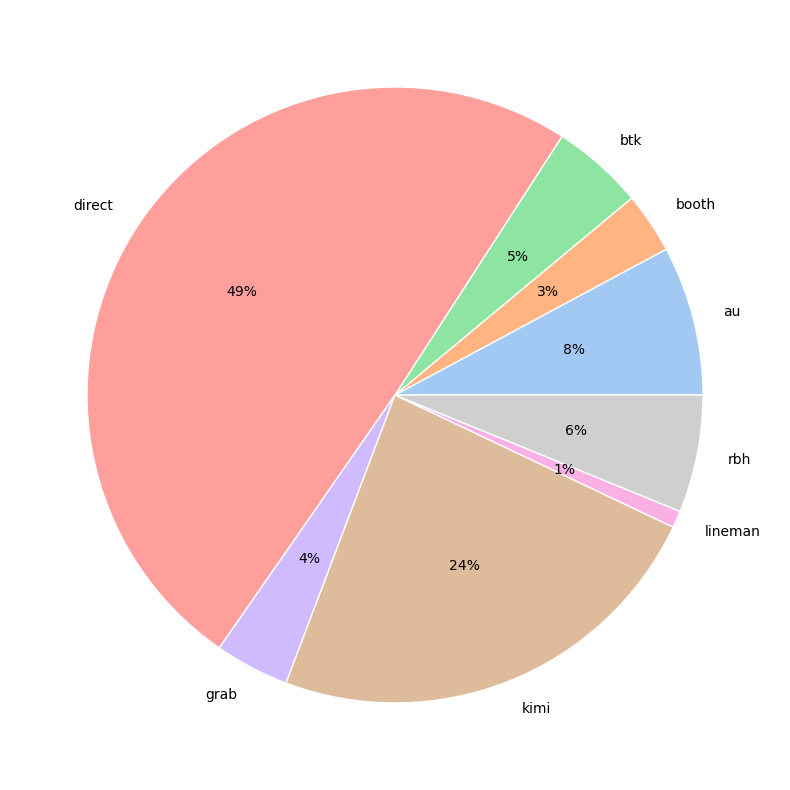

In [9]:
plt.figure(figsize=(10,10))
colors = sns.color_palette('pastel')
plt.pie(pp['purchasing_price'], labels = pp.index, autopct='%.0f%%', wedgeprops = { 'linewidth' : 1, 'edgecolor' : 'white' }, colors = colors)

Plot the pie chart to see the sales channel proportion

In [10]:
food_deli_combined = sales
food_deli_combined.loc[food_deli_combined['channel'].isin(['grab', 'lineman', 'rbh']), 'channel'] = 'food_delivery'
food_deli_combined.head()

,latitude,longitude,purchasing_date,purchasing_time,channel,chocolate,banoffee,passionfruit_froyo,greentea_mascapone,lemon_curd,...,salted_egg,strawberry_cheese_cake,matcha,malt,salted_caramel_froyo,watermelon,yuzu,total,purchasing_price_after_gp,purchasing_price
0,13.82203,100.507048,2021-08-14,NaN,direct,2,2,0,0,2,...,0,0,0,0,0,0,0,8,600.0,600.0
1,13.71937,100.588496,2021-08-14,NaN,direct,1,1,0,0,1,...,0,0,0,0,0,0,0,4,348.0,348.0
2,13.806404,100.572635,2021-08-14,NaN,direct,1,1,0,0,1,...,0,0,0,0,0,0,0,5,430.0,430.0
3,13.87397,100.631423,2021-08-14,NaN,direct,3,3,0,0,3,...,0,0,0,0,0,0,0,12,938.0,938.0
4,13.949663,100.646382,2021-08-14,NaN,direct,3,4,0,0,5,...,0,0,0,0,0,0,0,15,1237.0,1237.0


The proportion seems a little too in detailed. I am going to group the grab, lineman and rbh into the food delivery channel

([<matplotlib.patches.Wedge at 0x79cdb22cefd0>,
 [Text(1.0667053478521342, 0.2685883483393448, 'au'),
  Text(0.9118240150025516, 0.6152860844067796, 'booth'),
  Text(0.7295913461023462, 0.8232232186306255, 'btk'),
  Text(-0.9138864945883002, 0.6122184863340122, 'direct'),
  Text(-0.2855909317016924, -1.0622795393538178, 'food_delivery'),
  Text(0.8089654934824353, -0.7453689223161376, 'kimi')],
 [Text(0.5818392806466186, 0.1465027354578244, '8%'),
  Text(0.4973585536377554, 0.33561059149460704, '3%'),
  Text(0.3979589160558252, 0.44903084652579567, '5%'),
  Text(-0.49848354250270915, 0.33393735618218845, '49%'),
  Text(-0.15577687183728675, -0.5794252032839006, '11%'),
  Text(0.44125390553587374, -0.4065648667178932, '24%')])

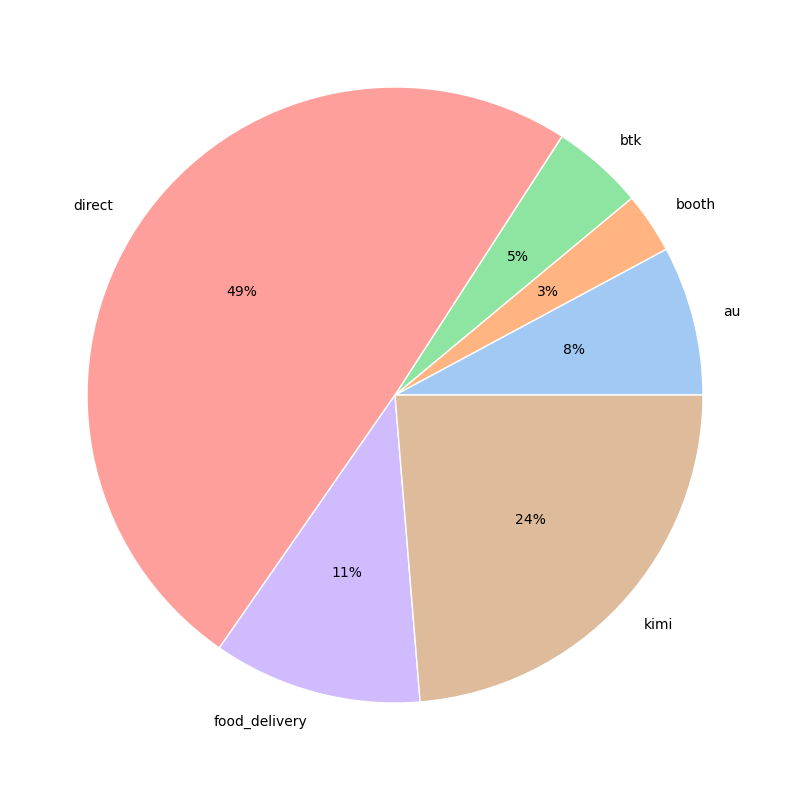

In [11]:
food_deli = food_deli_combined.groupby('channel').sum('purchasing_price')

plt.figure(figsize=(10,10))
colors = sns.color_palette('pastel')
plt.pie(food_deli['purchasing_price'], labels = food_deli.index, autopct='%.0f%%', wedgeprops = { 'linewidth' : 1, 'edgecolor' : 'white' }, colors = colors)

Plot the proportion of sales channel

In [12]:
sales['month_year'] = sales['purchasing_date'].dt.to_period('M')
sales.head()

,latitude,longitude,purchasing_date,purchasing_time,channel,chocolate,banoffee,passionfruit_froyo,greentea_mascapone,lemon_curd,...,strawberry_cheese_cake,matcha,malt,salted_caramel_froyo,watermelon,yuzu,total,purchasing_price_after_gp,purchasing_price,month_year
0,13.82203,100.507048,2021-08-14,NaN,direct,2,2,0,0,2,...,0,0,0,0,0,0,8,600.0,600.0,2021-08
1,13.71937,100.588496,2021-08-14,NaN,direct,1,1,0,0,1,...,0,0,0,0,0,0,4,348.0,348.0,2021-08
2,13.806404,100.572635,2021-08-14,NaN,direct,1,1,0,0,1,...,0,0,0,0,0,0,5,430.0,430.0,2021-08
3,13.87397,100.631423,2021-08-14,NaN,direct,3,3,0,0,3,...,0,0,0,0,0,0,12,938.0,938.0,2021-08
4,13.949663,100.646382,2021-08-14,NaN,direct,3,4,0,0,5,...,0,0,0,0,0,0,15,1237.0,1237.0,2021-08


I want to know the sales of each month. I start with inserting a column called month_year which is extracted from the purchasing date

In [13]:
sales_my = sales.groupby('month_year').sum('purchasing_price').sort_values('month_year')
sales_my = sales_my.reset_index()
sales_my.head()

,month_year,longitude,chocolate,banoffee,passionfruit_froyo,greentea_mascapone,lemon_curd,sweet_potato,almond,salted_egg,strawberry_cheese_cake,matcha,malt,salted_caramel_froyo,watermelon,yuzu,total,purchasing_price_after_gp,purchasing_price
0,2021-08,7566.839343,140,121,4,3,123,0,130,0,0,0,0,0,0,0,527,44026.0,44026.0
1,2021-09,4018.577399,63,64,53,65,18,0,0,0,0,0,0,0,0,0,285,23085.0,23085.0
2,2021-10,4021.423257,52,59,38,53,50,35,29,10,0,0,0,0,0,0,326,26616.0,26616.0
3,2021-11,1609.132922,31,24,17,23,28,23,22,19,1,0,1,1,0,0,190,15110.0,15110.0
4,2021-12,3819.717716,45,38,27,7,37,29,29,23,48,23,0,0,0,0,506,39798.0,39798.0


Sum the purchasing price data and group them by each month-year

[Text(0.5, 0, 'Month-Year'), Text(0, 0.5, 'Total Sales (THB)')]

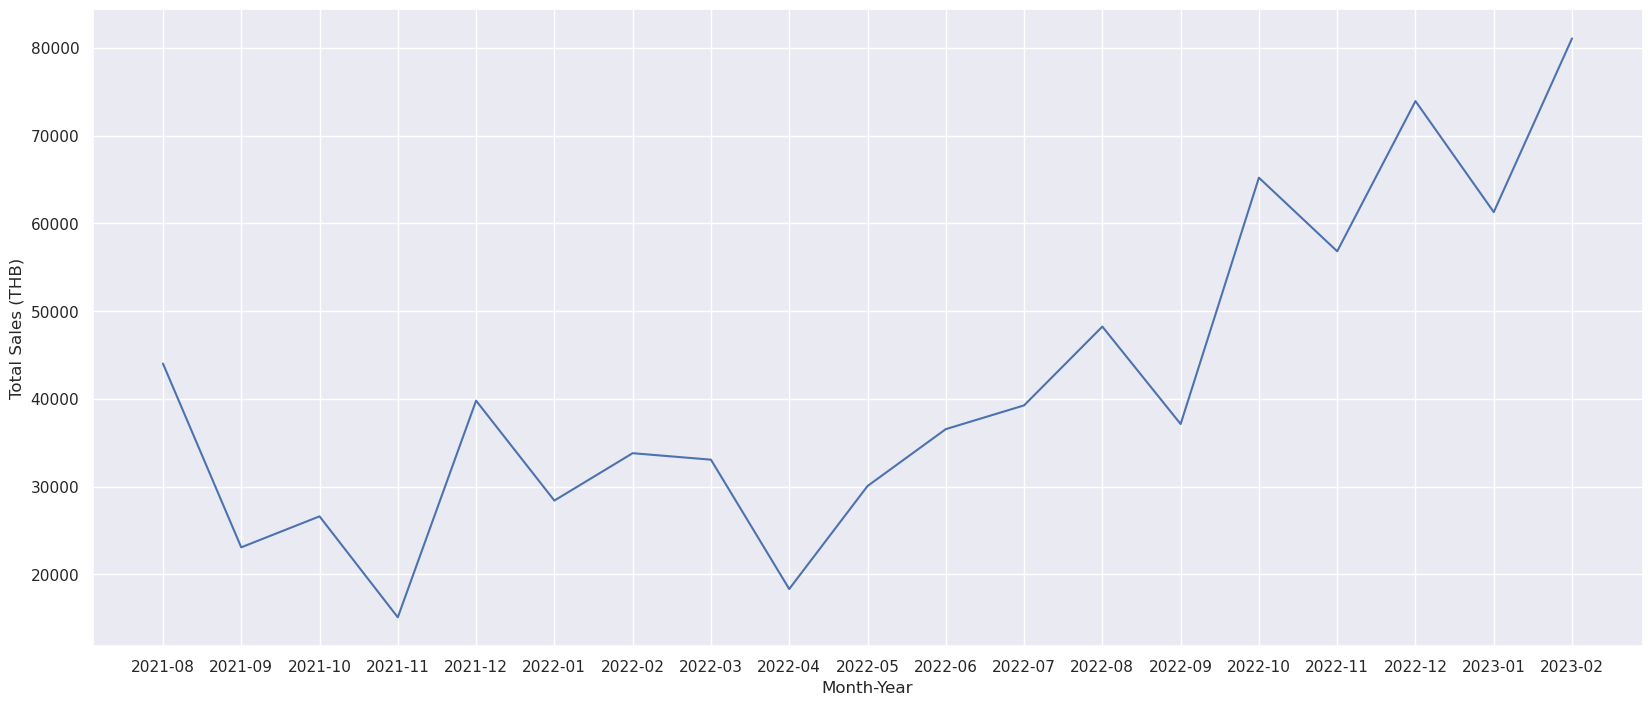

In [14]:
sns.set(rc={'figure.figsize':(20,8.27)})
fig1 = sns.lineplot(data=sales_my, x=sales_my['month_year'].astype(str), y='purchasing_price')
fig1.set(xlabel='Month-Year', ylabel='Total Sales (THB)')

Plot the total sales by each month-year

I want to know what is the reason of sales increment, starting in Q3. I know i started supplying Kimi, an Omakase restaurant some where in the year 2022, let's see if this is the reason of the pumping.


In [15]:
sales[sales['channel']=='kimi']['purchasing_date']

451   2022-05-31
463   2022-06-13
467   2022-06-17
468   2022-06-21
470   2022-06-24
         ...    
885   2023-02-14
895   2023-02-17
906   2023-02-21
915   2023-02-24
917   2023-02-26
Name: purchasing_date, Length: 97, dtype: datetime64[ns]

By looking at the data below, I started supplying Kimi in the late of May. Since Kimi is a hugh customer, with 24% shares in total sales. Kimi must play a crucial part in sales increment.

In [16]:
food_deli_combined_sum = food_deli_combined.groupby(['month_year','channel']).sum('purchasing_price')
food_deli_combined_sum = food_deli_combined_sum.reset_index()
food_deli_combined_sum

,month_year,channel,longitude,chocolate,banoffee,passionfruit_froyo,greentea_mascapone,lemon_curd,sweet_potato,almond,salted_egg,strawberry_cheese_cake,matcha,malt,salted_caramel_froyo,watermelon,yuzu,total,purchasing_price_after_gp,purchasing_price
0,2021-08,direct,7566.839343,140,121,4,3,123,0,130,0,0,0,0,0,0,0,527,44026.000,44026.0
1,2021-09,direct,4018.577399,63,64,53,65,18,0,0,0,0,0,0,0,0,0,285,23085.000,23085.0
2,2021-10,direct,4021.423257,52,59,38,53,50,35,29,10,0,0,0,0,0,0,326,26616.000,26616.0
3,2021-11,direct,1609.132922,31,24,17,23,28,23,22,19,1,0,1,1,0,0,190,15110.000,15110.0
4,2021-12,direct,3819.717716,45,38,27,7,37,29,29,23,48,23,0,0,0,0,506,39798.000,39798.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61,2023-02,au,0.000000,0,7,0,0,0,0,0,9,11,0,0,0,0,0,27,1230.120,2025.0
62,2023-02,booth,904.947598,43,48,2,0,0,0,0,25,59,19,29,54,22,0,411,30825.000,25275.0
63,2023-02,direct,301.679157,8,56,2,0,0,0,0,57,72,8,76,6,6,0,291,23090.000,22827.5
64,2023-02,food_delivery,0.000000,21,20,8,0,0,0,0,8,31,14,19,25,9,0,155,9247.646,11915.0


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

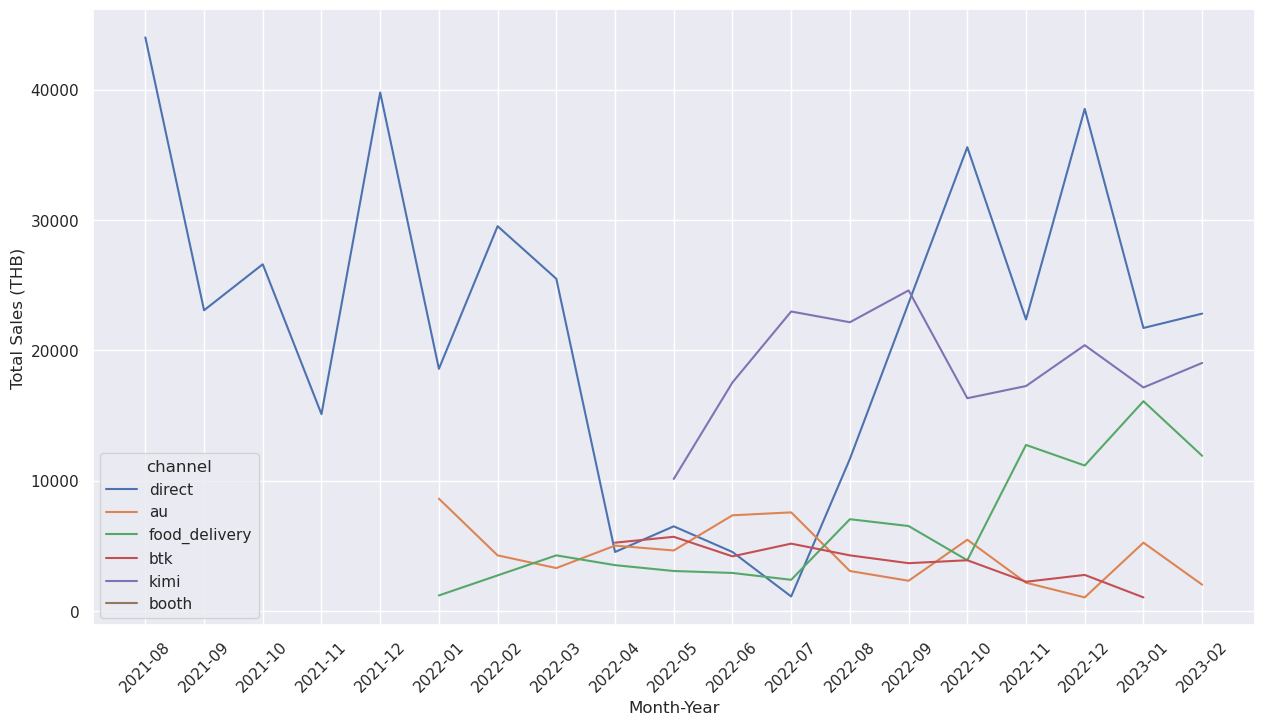

In [17]:
sns.set(rc={'figure.figsize':(15,8)})
fig2 = sns.lineplot(data=food_deli_combined_sum, x=food_deli_combined_sum['month_year'].astype(str), y='purchasing_price', hue = 'channel')

fig2.set(xlabel='Month-Year', ylabel='Total Sales (THB)')
plt.xticks(rotation=45)

We experienced a new sellers surge during the first few months, but subsequently witnessed a decline in direct sales despite our attempts to boost sales through other channels such as After you and food delivery applications from the beginning of 2022. However, the sales generated through these channels were unable to compensate for the decline in direct sales, resulting in hitting rock bottom in April 2022. As a result, we recognize the need for a new marketing strategy.

Initially, we advertised on Instagram and Facebook, and hired influencers, but these efforts yielded limited success. However, we were able to establish partnerships with restaurants such as Kimi and Boon Tong Kee, who were satisfied with our ice cream and began stocking our products. Additionally, we were fortunate to have friends who were getting married and who kindly agreed to set up ice cream booths at their weddings. Attendees were impressed with the quality of our products, resulting in invitations to participate in many more weddings.

Furthermore, we discovered a new approach to reaching a wider audience through TikTok. Since focusing on TikTok from September 2022, we have experienced a significant increase in food delivery sales (green line), reaching three times the previous levels. In late November 2022, we went viral with a video that garnered a total of 12 million views and 1.1 million likes by February 2023.

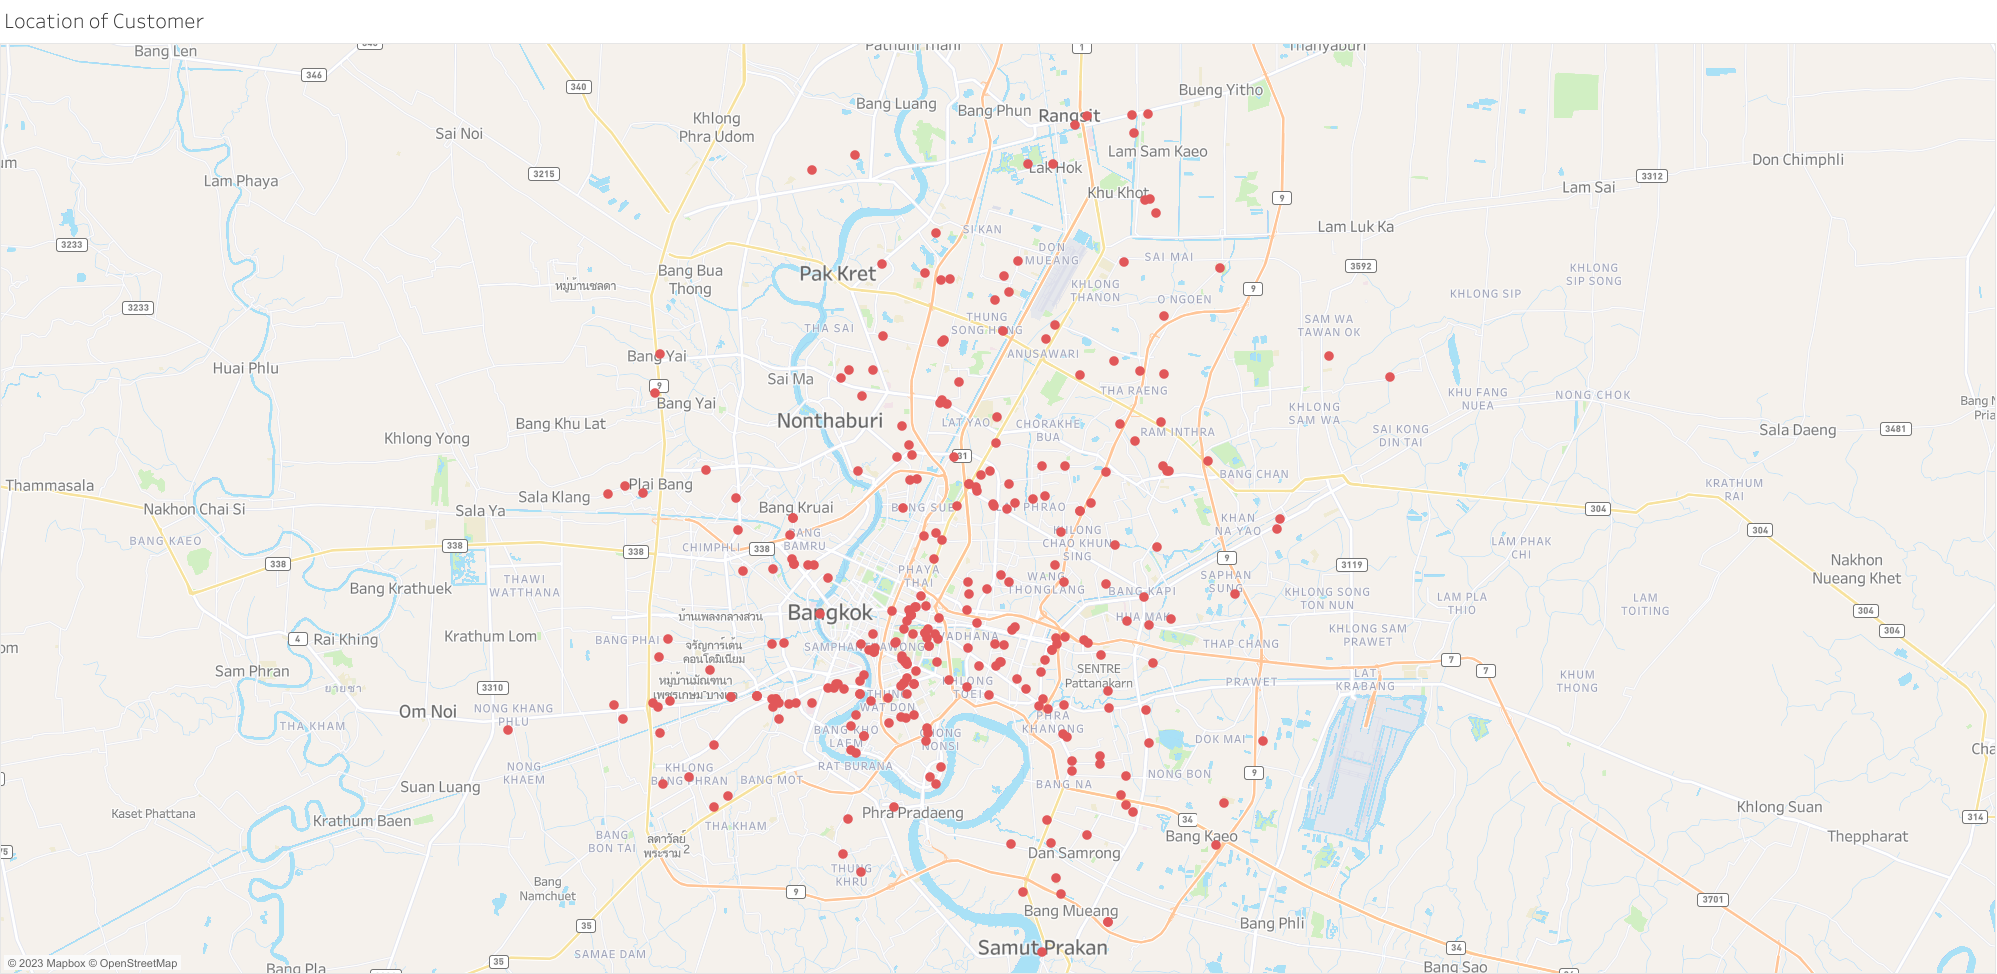

I extract the Latitude, and Longitude from the address by using the Google sheet adds-on called Geocode and plot the customer location in Tableau. We can say that the majority of our customers are living in the heart of the Bangkok.

**Let's find out how each flavour performs**

In [19]:
flavour_count = sales[(sales['channel'] != 'kimi') & (sales['channel'] != 'btk') & (sales['channel'] != 'au')] 
flavour_count.sort_values('purchasing_date')

,latitude,longitude,purchasing_date,purchasing_time,channel,chocolate,banoffee,passionfruit_froyo,greentea_mascapone,lemon_curd,...,strawberry_cheese_cake,matcha,malt,salted_caramel_froyo,watermelon,yuzu,total,purchasing_price_after_gp,purchasing_price,month_year
0,13.82203,100.507048,2021-08-14,NaN,direct,2,2,0,0,2,...,0,0,0,0,0,0,8,600.000,600.0,2021-08
16,13.723955,100.551180,2021-08-14,NaN,direct,1,0,0,0,0,...,0,0,0,0,0,0,2,150.000,150.0,2021-08
15,13.712944,100.477031,2021-08-14,NaN,direct,1,1,0,0,2,...,0,0,0,0,0,0,5,416.000,416.0,2021-08
14,13.774934,100.451414,2021-08-14,NaN,direct,0,2,0,0,2,...,0,0,0,0,0,0,4,367.000,367.0,2021-08
12,13.743121,100.415282,2021-08-14,NaN,direct,2,2,0,0,2,...,0,0,0,0,0,0,8,601.000,601.0,2021-08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,NaN,NaN,2023-02-24,19:12:00,food_delivery,0,0,0,0,0,...,2,0,0,0,0,0,2,115.430,170.0,2023-02
912,NaN,NaN,2023-02-24,NaN,direct,0,0,0,0,0,...,0,0,1,1,0,0,2,150.000,150.0,2023-02
914,NaN,NaN,2023-02-24,12:48:00,food_delivery,1,0,0,0,0,...,0,0,0,2,1,0,4,230.860,340.0,2023-02
916,NaN,NaN,2023-02-25,10:26:00,food_delivery,2,0,2,0,0,...,1,0,1,2,0,0,9,519.435,765.0,2023-02


I drop the channel Kimi, Boon Tong Kee and After you, since those sales channels does not have all the flavours.

In [20]:
sum_flavour = flavour_count.iloc[:,5:19].sum()
sum_flavour

chocolate                 757
banoffee                  704
passionfruit_froyo        347
greentea_mascapone        154
lemon_curd                435
sweet_potato               98
almond                    268
salted_egg                381
strawberry_cheese_cake    646
matcha                    359
malt                      393
salted_caramel_froyo      296
watermelon                 48
yuzu                        0
dtype: int64

In [21]:
sum_flavour = sum_flavour.drop('yuzu')

Yuzu is not officially realeased

In [22]:
sum_flavour = sum_flavour.to_frame().reset_index()
sum_flavour.columns = ['flavour', 'quantity_count']

sum_flavour

,flavour,quantity_count
0,chocolate,757
1,banoffee,704
2,passionfruit_froyo,347
3,greentea_mascapone,154
4,lemon_curd,435
5,sweet_potato,98
6,almond,268
7,salted_egg,381
8,strawberry_cheese_cake,646
9,matcha,359


The table shows the total quantity count but each flavour does not have the same released or termination date. It is unfair to compare each of them

In [23]:
flavour_count[flavour_count['chocolate'] == 1]['purchasing_date'].iat[-1] - flavour_count[flavour_count['chocolate'] == 1]['purchasing_date'].iat[0]

Timedelta('559 days 00:00:00')

Extract the on-shelf period

In [24]:
d = {'flavour': 
       ['chocolate',
        'banoffee',
        'passionfruit_froyo',
        'greentea_mascapone',
        'lemon_curd',
        'sweet_potato',
        'almond',
        'salted_egg',
        'strawberry_cheese_cake',
        'matcha',
        'malt',
        'salted_caramel_froyo',
        'watermelon'],
     'days_count':   
        [
        (flavour_count[flavour_count['chocolate'] == 1]['purchasing_date'].iat[-1]                -    flavour_count[flavour_count['chocolate'] == 1]['purchasing_date'].iat[0]),
        (flavour_count[flavour_count['banoffee'] == 1]['purchasing_date'].iat[-1]                 -    flavour_count[flavour_count['banoffee'] == 1]['purchasing_date'].iat[0]),
        (flavour_count[flavour_count['passionfruit_froyo'] == 1]['purchasing_date'].iat[-1]       -    flavour_count[flavour_count['passionfruit_froyo'] == 1]['purchasing_date'].iat[0]),
        (flavour_count[flavour_count['greentea_mascapone'] == 1]['purchasing_date'].iat[-1]       -    flavour_count[flavour_count['greentea_mascapone'] == 1]['purchasing_date'].iat[0]),
        (flavour_count[flavour_count['lemon_curd'] == 1]['purchasing_date'].iat[-1]               -    flavour_count[flavour_count['lemon_curd'] == 1]['purchasing_date'].iat[0]),
        (flavour_count[flavour_count['sweet_potato'] == 1]['purchasing_date'].iat[-1]             -    flavour_count[flavour_count['sweet_potato'] == 1]['purchasing_date'].iat[0]),
        (flavour_count[flavour_count['almond'] == 1]['purchasing_date'].iat[-1]                   -    flavour_count[flavour_count['almond'] == 1]['purchasing_date'].iat[0]),
        (flavour_count[flavour_count['salted_egg'] == 1]['purchasing_date'].iat[-1]               -    flavour_count[flavour_count['salted_egg'] == 1]['purchasing_date'].iat[0]),
        (flavour_count[flavour_count['strawberry_cheese_cake'] == 1]['purchasing_date'].iat[-1]   -    flavour_count[flavour_count['strawberry_cheese_cake'] == 1]['purchasing_date'].iat[0]),
        (flavour_count[flavour_count['matcha'] == 1]['purchasing_date'].iat[-1]                   -    flavour_count[flavour_count['matcha'] == 1]['purchasing_date'].iat[0]),
        (flavour_count[flavour_count['malt'] == 1]['purchasing_date'].iat[-1]                     -    flavour_count[flavour_count['malt'] == 1]['purchasing_date'].iat[0]),
        (flavour_count[flavour_count['salted_caramel_froyo'] == 1]['purchasing_date'].iat[-1]     -    flavour_count[flavour_count['salted_caramel_froyo'] == 1]['purchasing_date'].iat[0]),
        (flavour_count[flavour_count['watermelon'] == 1]['purchasing_date'].iat[-1]               -    flavour_count[flavour_count['watermelon'] == 1]['purchasing_date'].iat[0])
        ]
    }
since_1st_sales_day = pd.DataFrame(data=d)
since_1st_sales_day['days_count'] = since_1st_sales_day['days_count'].dt.days
since_1st_sales_day

,flavour,days_count
0,chocolate,559
1,banoffee,558
2,passionfruit_froyo,539
3,greentea_mascapone,136
4,lemon_curd,447
5,sweet_potato,114
6,almond,446
7,salted_egg,490
8,strawberry_cheese_cake,455
9,matcha,425


In [25]:
flavours_sales_days_count = pd.merge(sum_flavour,since_1st_sales_day,on='flavour',how='inner')
flavours_sales_days_count

,flavour,quantity_count,days_count
0,chocolate,757,559
1,banoffee,704,558
2,passionfruit_froyo,347,539
3,greentea_mascapone,154,136
4,lemon_curd,435,447
5,sweet_potato,98,114
6,almond,268,446
7,salted_egg,381,490
8,strawberry_cheese_cake,646,455
9,matcha,359,425


In [26]:
flavours_sales_days_count['rate'] = flavours_sales_days_count['quantity_count'] / flavours_sales_days_count['days_count']
flavours_sales_days_count.sort_values('days_count', ascending=False)

,flavour,quantity_count,days_count,rate
0,chocolate,757,559,1.354204
1,banoffee,704,558,1.261649
2,passionfruit_froyo,347,539,0.643785
7,salted_egg,381,490,0.777551
8,strawberry_cheese_cake,646,455,1.419780
10,malt,393,455,0.863736
11,salted_caramel_froyo,296,454,0.651982
4,lemon_curd,435,447,0.973154
6,almond,268,446,0.600897
9,matcha,359,425,0.844706


Calculate the rate of sales by divinding quantity count with day count

<Figure size 1500x1500 with 0 Axes>

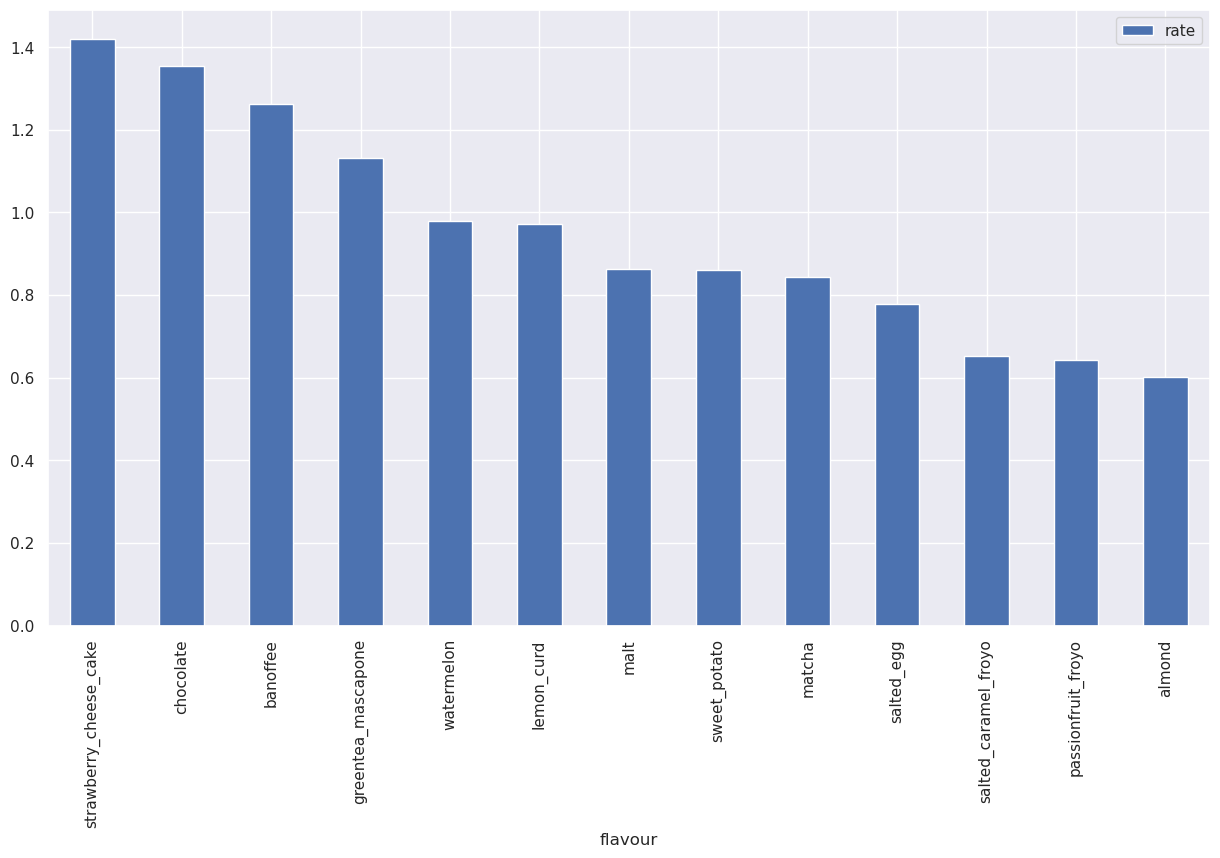

<Figure size 1500x1500 with 0 Axes>

In [27]:
flavours_sales_days_count = flavours_sales_days_count.sort_values(by = 'rate', ascending = False)
flavours_sales_days_count.plot(kind = 'bar',y='rate', x ='flavour')
plt.figure(figsize=(15,15))

Our top 3 overall perfomers are Strawberry Cheese Cake, Chocolate and Banoffee.

In [28]:
flavour_count['purchasing_month'] = pd.to_datetime(flavour_count['purchasing_date']) - pd.to_timedelta(1, unit='m')


flavour_by_month = flavour_count.groupby([pd.Grouper(key='purchasing_month', freq='M')]).sum()

flavour_by_month.drop(['longitude','total','purchasing_price_after_gp','purchasing_price'],axis=1,inplace=True)

base_flavour_by_month = flavour_by_month[['chocolate','banoffee','strawberry_cheese_cake','matcha','malt','salted_caramel_froyo']]
special_flavour_by_month = flavour_by_month[['passionfruit_froyo','greentea_mascapone','lemon_curd','sweet_potato','almond','salted_egg','watermelon','yuzu']]
base_flavour_by_month

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,chocolate,banoffee,strawberry_cheese_cake,matcha,malt,salted_caramel_froyo
purchasing_month,,,,,,
2021-08-31,140,121,0,0,0,0
2021-09-30,68,69,0,0,0,0
2021-10-31,47,54,0,0,0,0
2021-11-30,31,24,1,0,1,1
2021-12-31,45,38,48,23,0,0
2022-01-31,30,32,37,22,1,0
2022-02-28,59,45,56,41,0,0
2022-03-31,30,28,35,28,7,0
2022-04-30,5,9,13,10,10,0


Since we have different campagin, event and promotion in each month, it will be useful if we can monitor the sales quantity of each flavours in each month. I categorized our flavours in to two types, the base flavour and special flavour. Base flavours are those we planned to be a permanent on-shelf product. The special flavours is seasonal.

([<matplotlib.axis.XTick at 0x79cdb20bf450>,
 [Text(619, 0, 'Aug \n2021'),
  Text(620, 0, 'Sep \n2021'),
  Text(621, 0, 'Oct \n2021'),
  Text(622, 0, 'Nov \n2021'),
  Text(623, 0, 'Dec \n2021'),
  Text(624, 0, 'Jan \n2022'),
  Text(625, 0, 'Feb \n2022'),
  Text(626, 0, 'Mar \n2022'),
  Text(627, 0, 'Apr \n2022'),
  Text(628, 0, 'May \n2022'),
  Text(629, 0, 'Jun \n2022'),
  Text(630, 0, 'Jul \n2022'),
  Text(631, 0, 'Aug \n2022'),
  Text(632, 0, 'Sep \n2022'),
  Text(633, 0, 'Oct \n2022'),
  Text(634, 0, 'Nov \n2022'),
  Text(635, 0, 'Dec \n2022'),
  Text(636, 0, 'Jan \n2023'),
  Text(637, 0, 'Feb \n2023')])

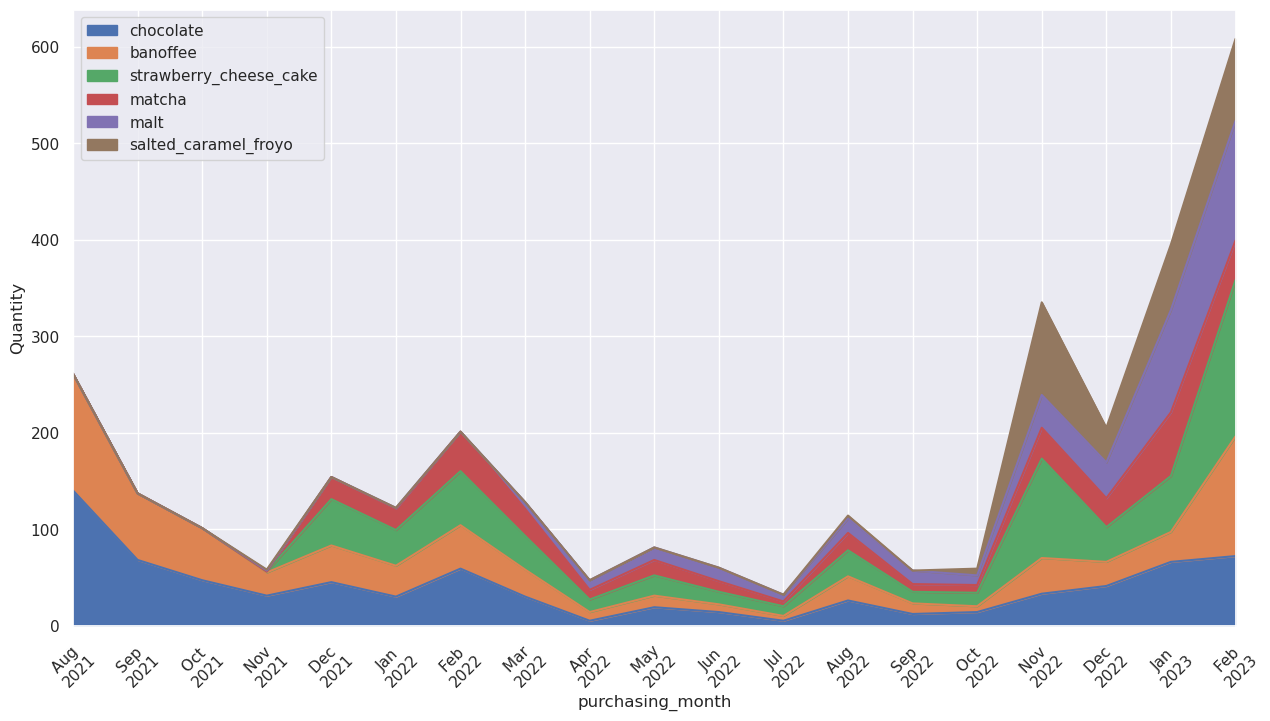

In [29]:
base_flavour_by_month.plot(kind='area')
plt.ylabel('Quantity')
plt.xticks(special_flavour_by_month.index, [x.strftime('%b \n%Y') for x in special_flavour_by_month.index], rotation=45)

([<matplotlib.axis.XTick at 0x79cda6efd910>,
 [Text(619, 0, 'Aug \n2021'),
  Text(620, 0, 'Sep \n2021'),
  Text(621, 0, 'Oct \n2021'),
  Text(622, 0, 'Nov \n2021'),
  Text(623, 0, 'Dec \n2021'),
  Text(624, 0, 'Jan \n2022'),
  Text(625, 0, 'Feb \n2022'),
  Text(626, 0, 'Mar \n2022'),
  Text(627, 0, 'Apr \n2022'),
  Text(628, 0, 'May \n2022'),
  Text(629, 0, 'Jun \n2022'),
  Text(630, 0, 'Jul \n2022'),
  Text(631, 0, 'Aug \n2022'),
  Text(632, 0, 'Sep \n2022'),
  Text(633, 0, 'Oct \n2022'),
  Text(634, 0, 'Nov \n2022'),
  Text(635, 0, 'Dec \n2022'),
  Text(636, 0, 'Jan \n2023'),
  Text(637, 0, 'Feb \n2023')])

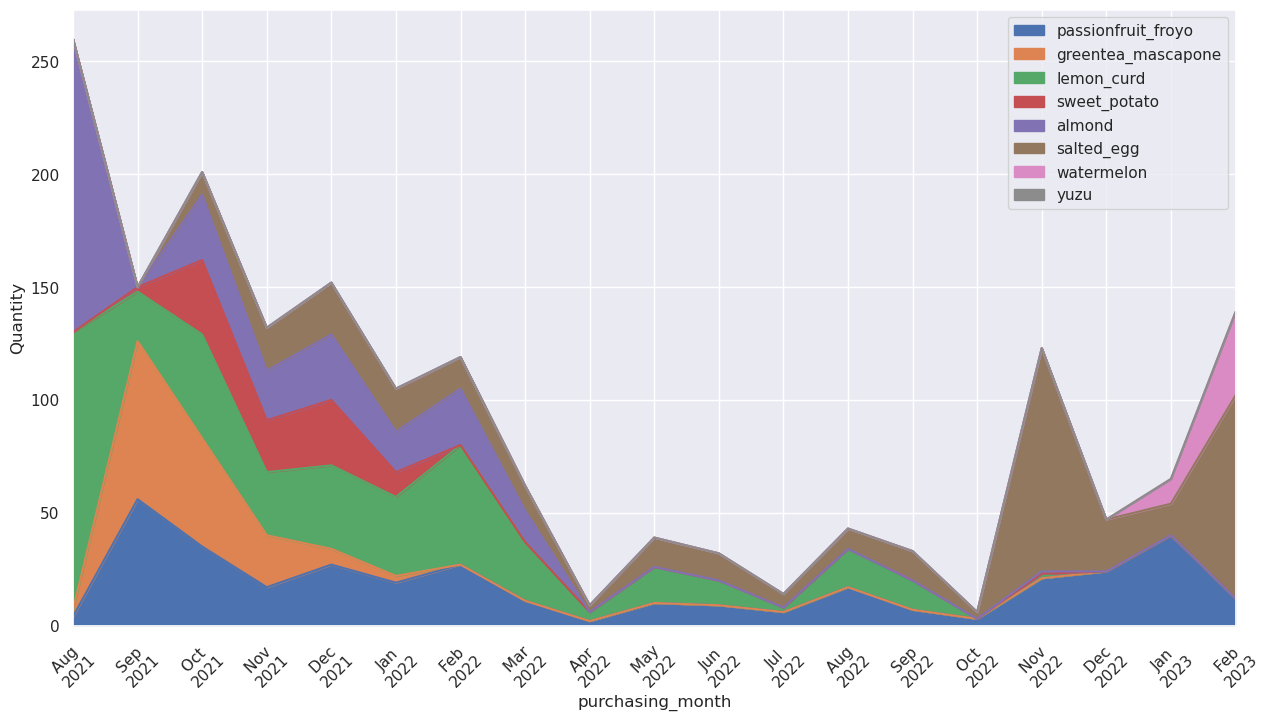

In [30]:
special_flavour_by_month.plot(kind='area')
plt.ylabel('Quantity')
plt.xticks(special_flavour_by_month.index, [x.strftime('%b \n%Y') for x in special_flavour_by_month.index], rotation=45)